In [3]:
import os
import tarfile 
import urllib.request
import numpy as np

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [4]:
fetch_housing_data()

In [7]:
import pandas as pd 
def load_housing_data( housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


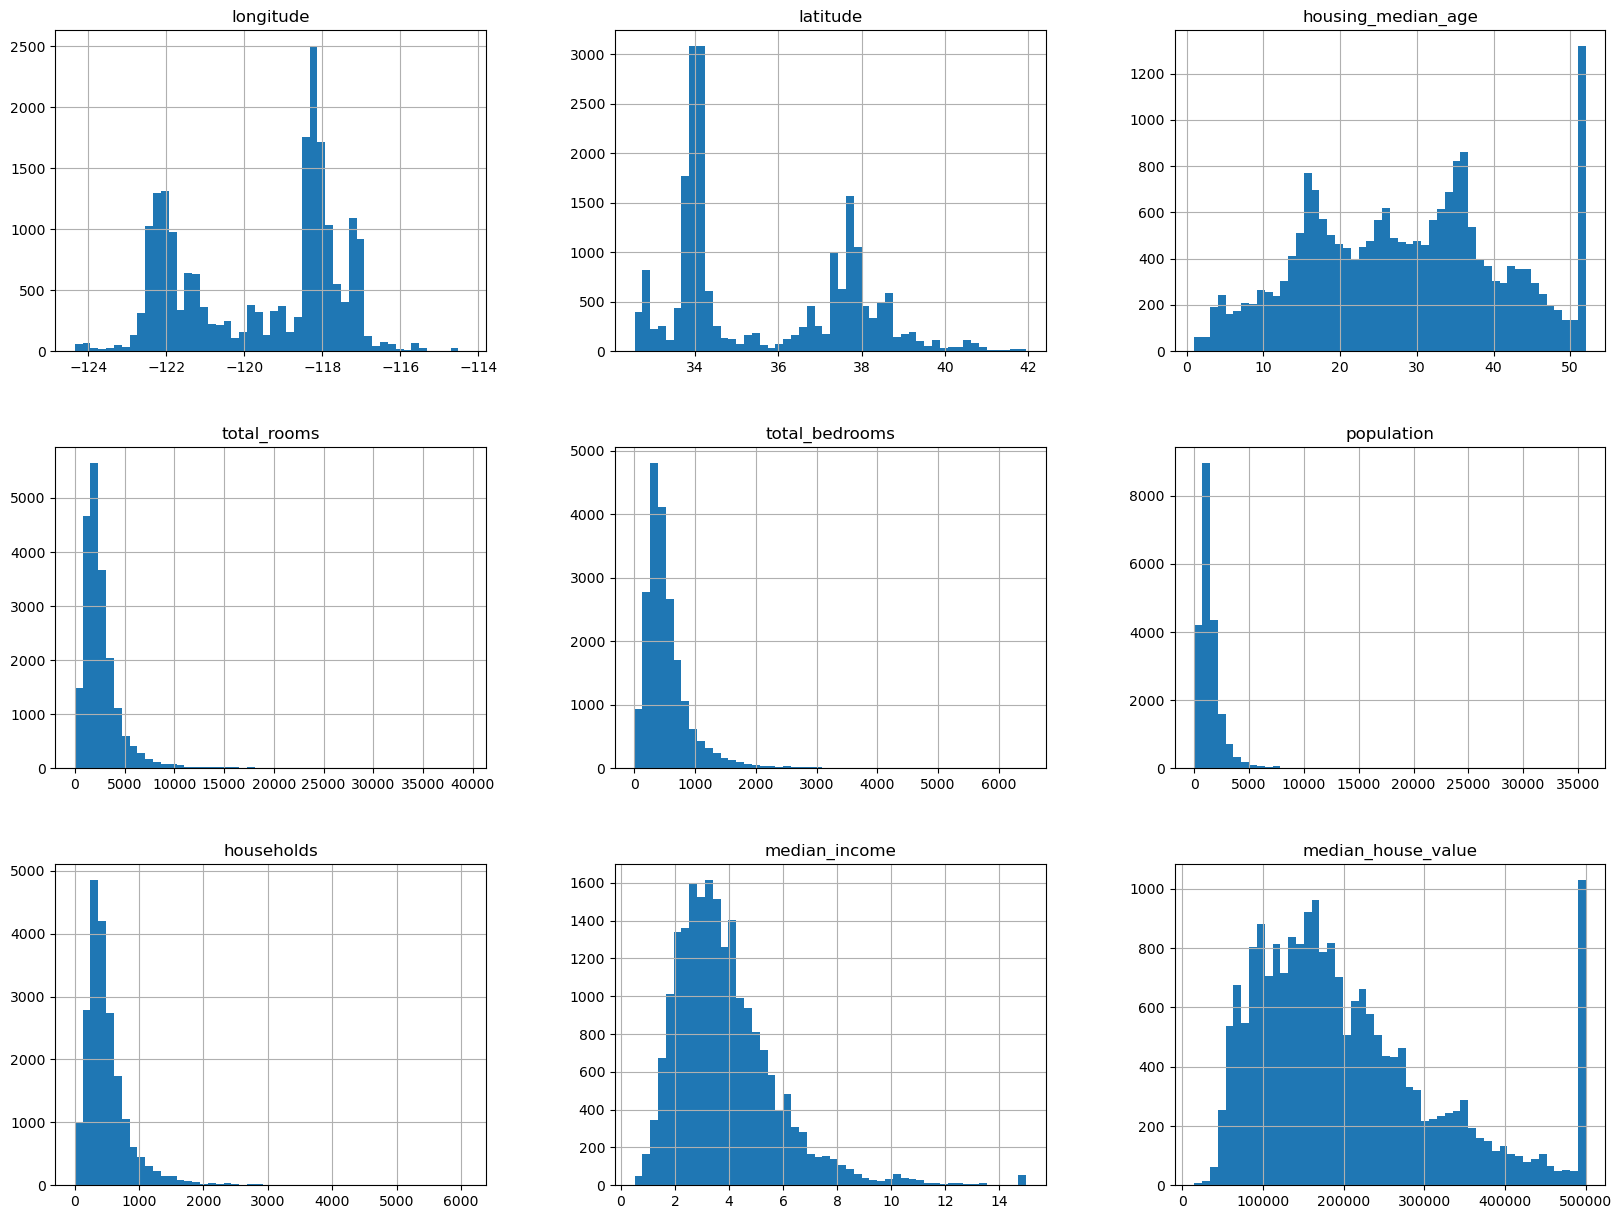

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt 
housing.hist( bins=50, figsize=(20,15))
plt.show()

In [13]:
def trennung_train_test (data, test_ratio):
    test_set_size = int(len(data)*test_ratio)
    np.random.seed(11)
    random_indices = np.random.permutation(len(data))
    test_indices = random_indices[:test_set_size]
    train_indices = random_indices[test_set_size:]
    return data.iloc[test_indices] , data.iloc[train_indices]

In [14]:
test_set, train_set = trennung_train_test(housing, 0.2)

In [15]:
len(train_set)

16512

In [16]:
len(test_set)

4128

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=11)

In [18]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2734,-115.56,32.78,34.0,2856.0,555.0,1627.0,522.0,3.2083,76200.0,INLAND
9087,-118.17,34.66,9.0,1561.0,253.0,731.0,233.0,5.7049,173200.0,INLAND
15789,-122.40,37.78,52.0,464.0,202.0,286.0,148.0,1.6125,112500.0,NEAR BAY
12992,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,137000.0,INLAND
19275,-122.79,38.42,9.0,4967.0,885.0,2581.0,915.0,5.0380,185600.0,<1H OCEAN


In [19]:
# creation d'un attribut "income_cat" qui indique la cathegorie de chaque personne en fonction de la valeur "median_income" qui represente la valeur du revenu dans le menage
housing["income_cat"]= pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

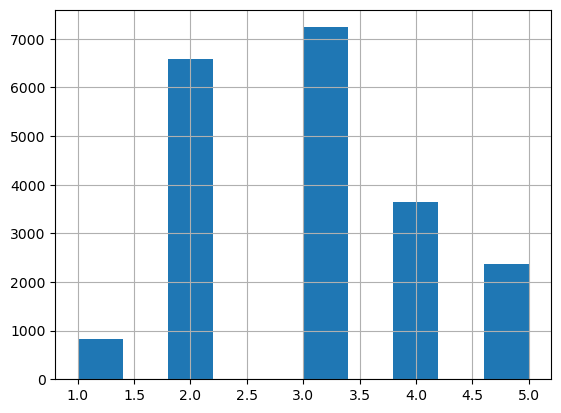

In [20]:
housing["income_cat"].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=11)
for train_indices, test_indices in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_indices]
    strat_test_set = housing.loc[test_indices]


In [22]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [23]:
#suppression de l'attribut "income_cat" dans l'ensemble de donnee d'entrainement et de test pour que nos donnee reviennet a leur etat d'origine 
for elm in (strat_train_set, strat_test_set):
    elm.drop("income_cat", axis=1, inplace = True)

In [24]:
# on cree une copie des donnees d'entrainements sur la quelle on va travailler
housing_train = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

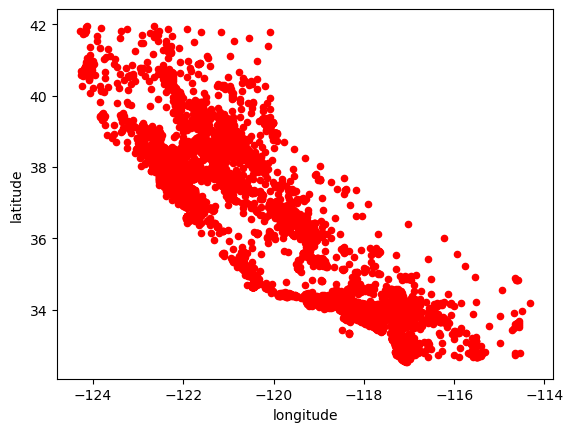

In [25]:
#observation des differents point des donnees d'entrainement en fonction de la longitude et de la latitude
# le but etant de reconnaitre un "muster" qui pourra se degage de l'echantillon des donnees
housing_train.plot( kind= "scatter", x="longitude", y="latitude", c="red" ) 
#plt.scatter(x="longitude", y="latitude", data= housing_train, c="red")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

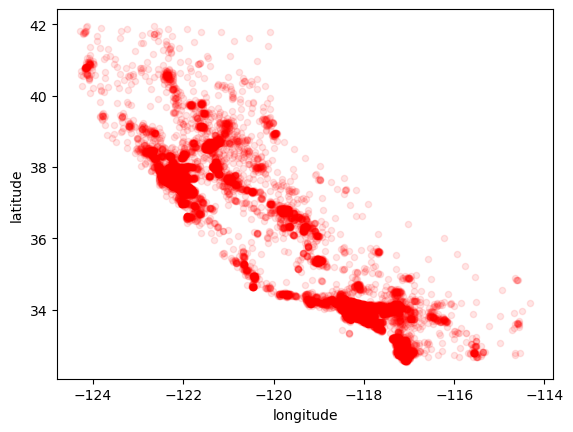

In [26]:
# en appliquant apha = 0.1 cela nous permet de reconnaitre des zones avec une forte densite
housing_train.plot( kind= "scatter", x="longitude", y="latitude", c="red", alpha= 0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

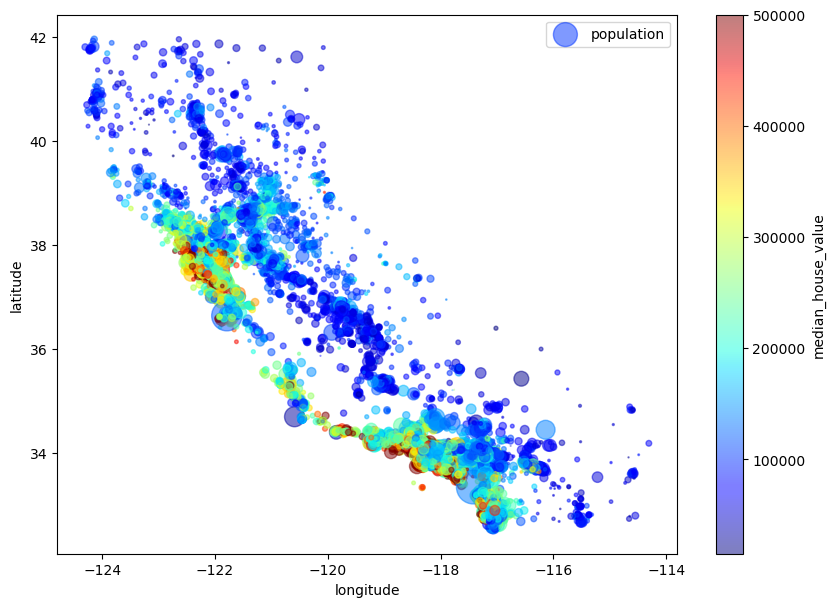

In [27]:
# l'attribut "s" permet de transformer chaque point en cercle avec pour rayon la valeur de s, L'attribut "c" permet de definir l'echelle de valleur la barre colore
# L'attribut "cmap" permet d'importer les couleurs
housing_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, s=housing_train["population"]/60, label="population",figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar= True)

In [28]:
# cacul de la matrice de corellation entre les differents attributs ou Merkmal qui montre la dependance des attributs entre elles  

corr_matrix = housing_train.corr()

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687829
total_rooms           0.136194
housing_median_age    0.100138
households            0.065931
total_bedrooms        0.050729
population           -0.026367
longitude            -0.043233
latitude             -0.147857
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

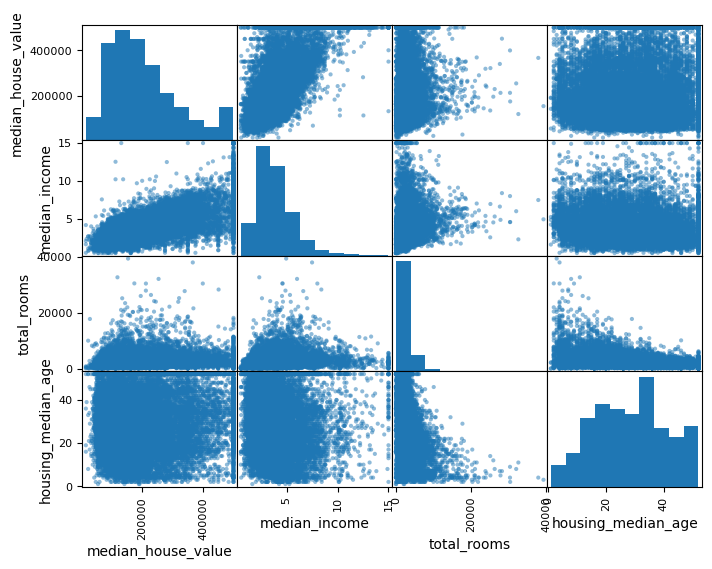

In [30]:
# le meme calcul de la corellation peut se faire a l'aide d'une fonction de la bibliotheque pandas
# Dans notre cas precis je vais appliquer cette fonction par soucis de visibilte uniquement a 4 attributs de nos donnees 

from pandas.plotting import scatter_matrix

attributes=["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(8,6))


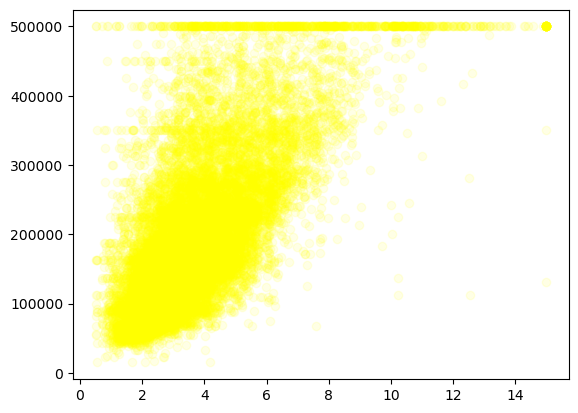

In [31]:
plt.scatter(x="median_income", y="median_house_value", data= housing_train, alpha=0.1 , c="yellow")
#housing_train.plot(kind="scatter", x="median_income", y="median_house_value",  alpha=0.7 )

In [32]:
# separation des donnees d'entrainement de leurs labels 
#Drop() supprise l'attribut preciser uniquement sur la copie des donnees qu'elle cree sans toutefois modifier les donnee sources
#dans notre cas precis drop() stocke une copie de housing_train dans housing_train_set en supprimant l'attribut "median_house_value" sur cette copie

housing_trainning= housing_train.drop("median_house_value", axis=1)

housing_labels= housing_train["median_house_value"].copy()

In [33]:
# etant donnee que l'attribut "total_bedrooms" de nos donnee a des valeurs manquantes , 3 choix s'offrent :
        # supprimer les lignes qui ont des valeurs manquantes avec la fonction dropna()
        # supprimer la colonne de cette attribut avec la fonction drop()
        # la remplir avec la valeur moyenne de cette atrribut  ( dans notre cas on choisira ce dernier cas) avec la fonction fillna()

median = housing_trainning["total_bedrooms"].median()
housing_trainning["total_bedrooms"].fillna(median, inplace=True)


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# La mediane n'etant calculer que sur des valeurs numeriques , on exclut L'attribut avec la valeur non numerique
housing_trainning_num = housing_trainning.drop("ocean_proximity", axis=1)

In [35]:
# Ensuite on adapte la methode a nos donnees numerique d'entrainement pour calculer la mediane de chaque attribut numerique avec la methode fit()
imputer.fit(housing_trainning_num)
# On peut visualisuer le resultat(la valeur des medianes des differents attributs) de la methode fit(), a l'aide de "statistics_"
# l'attribut "total_bedrooms" a des entrees manquantes et par consequent sa mediane ne sera pas calcule
imputer.statistics_


array([-118.5   ,   34.26  ,   29.    , 2125.    ,  434.    , 1166.    ,
        409.    ,    3.5313])

In [36]:
# remplir les valeur manquantes par la mediane
X = imputer.transform(housing_trainning_num)
voll_data_train = pd.DataFrame(X, columns=housing_trainning_num.columns, index=housing_trainning_num.index)

In [37]:
housing_cat= housing_trainning[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13406,INLAND
15049,<1H OCEAN
4600,<1H OCEAN
2109,INLAND
15760,NEAR BAY
3917,<1H OCEAN
11965,INLAND
16937,NEAR OCEAN
18205,<1H OCEAN
9788,INLAND


In [38]:
# jetzt geht'es darum das merkmal/attribut "ocean_proximity" zu bearbeiten
#"ocean_proximity" ist ein cathegorisches merkmal mit text value , da die meisten ML Algorithmus bevorzugt, mit Zahlen zu arbeiten,
#werden wir die Texte um zahlen umwandeln. Und dafur haben wir 2 Möglichkeiten
      # 1) mit OrdinalEncoder: Wird jeder cathegorie in merkmal mit 1 bit dargestellt 
      # 2) mit OneHotEncoder: wird jeder cathegorie in merkmal mit einem Vector mit lenght = die Anzahl der Cathegorie und wird mit 1 an der Stelle des Merkmals ausgefüllt und 0 auf anderen Stelle  
# L'option 2 est la meilleure et celle que nous allons implementer
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
# le resultat est donne sous forme de sparse matrix, ( cela permet au system d'economiser en espace memoire, etant donne que la plus part des entrees sont nulles)

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [39]:
# convertion sparse matrice vers numpy array
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [40]:
# Ici on cree nos propres transformations qui nous permettra de creer de nouveaux attributs a partir de celle existantes 
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]



In [47]:
# Da viele transformationsschritten in einer bestimmenten Abfoge durchgeführt werden, kann man die Klasse pipeline in  scikit-learn  nutzen  um solche abfolge von Transformation zu organisieren
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), 
    ("attribs_ader", CombinedAttributesAdder()), 
    ("std_scaler", StandardScaler()),
])
housing_num_tr= num_pipeline.fit_transform(housing_trainning_num)


In [52]:
housing_trainning.shape

(16512, 9)

In [48]:
# jusqu'ici on avait separer l'attribut(colomn) cathegorielle des colomn numerique, il serait plus pratique d'avoir un seule Transformer
#qui peut s'occuper de tous les colomns et utilise sur chaque colomn la transformation adapte en fonction du type de donnee qu'elle contient 
#La transformation ColumnTransform de scikit-learn nous aide dans ce sens 


from sklearn.compose import ColumnTransformer
num_attribs = list(housing_trainning_num)
cat_attribs= ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    
]) 
housing_prepared = full_pipeline.fit_transform(housing_trainning)

In [49]:
housing_prepared.shape

(16512, 16)

In [50]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [51]:
housing_prepared.shape

(16512, 16)

In [42]:
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
print("vorhersagen:", lin_reg.predict(some_data_prepared))

vorhersagen: [404819.79727649 430203.90340798 376874.32062357 317811.53165258
 252046.03913564 261066.05052361 256267.16000271 255365.55327284
 200535.06651098 267208.79432223]


In [43]:
print("labels:", list(some_labels))

labels: [101600.0, 193200.0, 118100.0, 54200.0, 250000.0, 192300.0, 162800.0, 415000.0, 336500.0, 250000.0]


In [44]:
#calcul de la fonction erreur (RMSE) du system
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68374.47729810608

In [45]:
# on constate que la valeur de la fonction erreur de notre system est tres grande, dans ce cas il S#agit d'un Undefitting
# 3 cas de figures pouraient resoudre ce probleme
    # 1) choisir un modelle plus complexe (dans le cas ou le modele utilise etait trop leger)
    # 2) Augmenter les donnes d'entrainement avec de nouvellles attributs ou merkmale qui reflete au mieux le pb etudie
    # 3) la diminution des restrictions du modelle ( au cas ou ce dernier a ete regulariser)
# dans notre cas le modele n'a pas ete regulariser, donc l'option 3) est mise de cote , on choisira plutot d'implementer l'option 1)
# 

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=11)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=11)

In [46]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [47]:
# on se rends compte ci haut que la fonction erreur donne un resultat 0 avec un modelle plus complexe, il s'agit clairement d'un cas d'overfitting
# pour une mieux evaluation de notre system on separe nos donnee d'entrainement en 2 parties a savoir
# une partie pour l'entrainement proprement dit (trainningsdatensatz) et une autre pour la validation (validerungsdatensatz)
#dans notre cas on va essayer une evaluation du system avec le kreuzvalidierung

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70023.4342306  72503.92384914 70562.31133473 72198.84994616
 70659.15427702 70465.9078777  74384.0725336  69449.38378315
 72456.11017325 72975.96313637]
Mean: 71567.91111417107
Standard deviation: 1479.9163756995156


In [49]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68933.8840818  63912.44545425 65182.47220495 69076.77351892
 68509.63409608 71268.19351746 72110.36234621 69043.61576356
 72588.71311982 67289.31142905]
Mean: 68791.54055320886
Standard deviation: 2662.689915391286


In [50]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor( random_state=11)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=11)

In [51]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18647.202815731296

In [52]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error")
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49219.48264534 49435.32182126 52675.95386084 50908.48503669
 52201.69813296]
Mean: 50888.18829941882
Standard deviation: 1401.2298388420838


In [53]:
#joblib ermöglicht erstellte Modelle zu speichern
import joblib

joblib.dump(RandomForestRegressor, "RandomForestRegressor.pkl")

['RandomForestRegressor.pkl']

In [54]:
joblib.dump(LinearRegression, "LinearRegression.pkl")

['LinearRegression.pkl']

In [55]:
joblib.dump(DecisionTreeRegressor, "DecisionTreeRegressor.pkl")

['DecisionTreeRegressor.pkl']

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=11)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=11),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
# Determiner les meileurs parametres
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [58]:
 
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=11)

In [59]:
#score de l'evaluation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64957.41050164264 {'max_features': 2, 'n_estimators': 3}
55866.247668442586 {'max_features': 2, 'n_estimators': 10}
52624.683583549704 {'max_features': 2, 'n_estimators': 30}
60853.8187607507 {'max_features': 4, 'n_estimators': 3}
52649.45008487302 {'max_features': 4, 'n_estimators': 10}
50538.84627970134 {'max_features': 4, 'n_estimators': 30}
59628.29749985384 {'max_features': 6, 'n_estimators': 3}
52454.838427762086 {'max_features': 6, 'n_estimators': 10}
50079.75699451303 {'max_features': 6, 'n_estimators': 30}
57928.40070016695 {'max_features': 8, 'n_estimators': 3}
51937.209176131175 {'max_features': 8, 'n_estimators': 10}
50290.130112697174 {'max_features': 8, 'n_estimators': 30}
62652.38276829093 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54624.79308029145 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60861.079828359514 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52831.02170619245 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [60]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.17245343e-02, 6.93649244e-02, 4.06431269e-02, 1.83117119e-02,
       1.60889466e-02, 1.95278420e-02, 1.56614489e-02, 3.11639279e-01,
       6.32938463e-02, 1.10100869e-01, 8.44372456e-02, 7.38163132e-03,
       1.64116569e-01, 2.28098043e-04, 2.86635798e-03, 4.61356912e-03])

In [61]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3116392788953748, 'median_income'),
 (0.1641165689288873, 'INLAND'),
 (0.11010086864539383, 'pop_per_hhold'),
 (0.08443724562619567, 'bedrooms_per_room'),
 (0.07172453431901454, 'longitude'),
 (0.06936492442200427, 'latitude'),
 (0.06329384633643541, 'rooms_per_hhold'),
 (0.040643126916062415, 'housing_median_age'),
 (0.019527842031520543, 'population'),
 (0.018311711864440375, 'total_rooms'),
 (0.016088946638773846, 'total_bedrooms'),
 (0.015661448913710182, 'households'),
 (0.007381631320110669, '<1H OCEAN'),
 (0.00461356912018391, 'NEAR OCEAN'),
 (0.002866357978921152, 'NEAR BAY'),
 (0.00022809804297114594, 'ISLAND')]

In [62]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [63]:
final_rmse

48690.002644250155

In [64]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46382.05076925, 50893.39919314])

In [65]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing_trainning, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([404819.79727649, 430203.90340798, 376874.32062357, 317811.53165258,
       252046.03913564, 261066.05052361, 256267.16000271, 255365.55327284,
       200535.06651098, 267208.79432223])

In [66]:
my_model = full_pipeline_with_predictor

In [69]:
import joblib
joblib.dump(my_model, "my_models") # DIFF



['my_models']